<b>**Aplicação do Algoritmo de regressão Linear**</b>

```
# Aplicação do modelo de regressão Linear para predição de valores de gorjeta
```





In [1]:
#Importação dos pacotes
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Carregamento dos dados
tips = sns.load_dataset('tips');

In [3]:
# Visualização do dataset
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [4]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

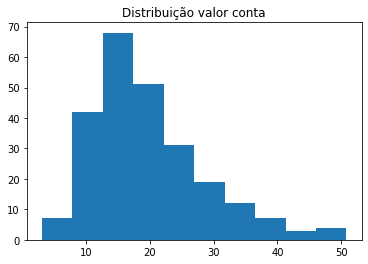

In [5]:
plt.hist(tips['total_bill'])
plt.title('Distribuição valor conta');

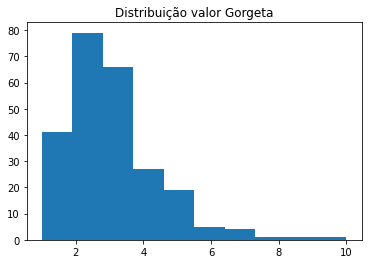

In [6]:
plt.hist(tips['tip'])
plt.title('Distribuição valor Gorgeta');

Text(0, 0.5, 'Tips')

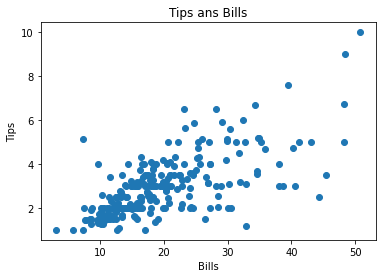

In [7]:
# Visualizando a dispersão dos dados
plt.scatter(tips['total_bill'].values, tips['tip'].values)
plt.title('Tips ans Bills')
plt.xlabel('Bills')
plt.ylabel('Tips')

In [8]:
# Selecionando apenas os dados para treinar o modelo.
# Não utilizando técnicas de Feature Selection
X = tips.iloc[:,0:1].values #Total da Conta
y = tips.iloc[:,1:2].values #Total da Gorjeta

In [9]:
#Instanciando o objeto e treinando o modelo
reg = LinearRegression().fit(X,y)

**Métricas do modelo**

In [30]:
# Avaliação do coeficiente de determinação, ou seja, quanto mais o valor desse indicador se aproxima de 1 ou 100% mais explicativo é o modelo linear.
# O modelo explica apenas 45% da variância dos dados
LinearScore = reg.score(X, y)

In [11]:
# Coeficiente de correlação das váriaveis, ou seja, "medição" do grau de associação linear entre duas variáveis.
# Quanto mais próximo de 1 mais é possível mais "forte" é a correlação entre as variaveis
reg.coef_

array([[0.10502452]])

In [12]:
# Mesmo analisando as métricas do modelo vamos realizar valor 200 e o modelo exibirá a predição para a gorjeta
reg.predict([[50]])

array([[6.17149548]])

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [24]:
#Métricas
mae = mean_absolute_error(X, y)
mse = mean_squared_error(X, y)
print('O Erro médio absoluto é:', mae)
print('O Erro médio Quadrático é:', mse)

O Erro médio absoluto é: 16.78766393442623
O Erro médio Quadrático é: 346.0816225409836


## Avaliando um segundo modelo de regressão 

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Instanciando 2 modelos com Profundidadade diferente
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
Decision1 = regr_1.score(X,y)

In [33]:
Decision2 = regr_2.score(X,y)

In [37]:
modelos = {'Linear':LinearScore, 'Decision1': Decision1, 'Decision2': Decision2}

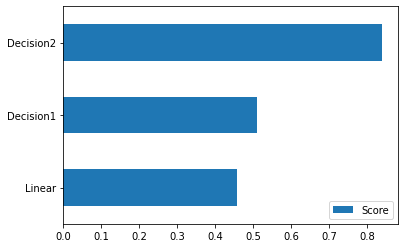

In [43]:
Comp_modelos = pd.DataFrame(modelos, index=["Score"])
Comp_modelos.T.plot.barh();

In [49]:
#Nosso melhor modelo aparentemente é o Decision Tree Regression com profundidade 10
regr_2.predict([[18]])

array([3.49222222])

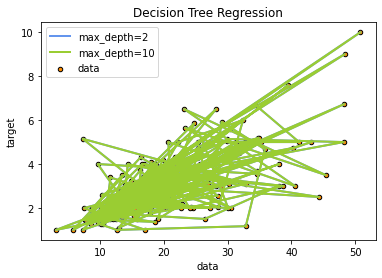

In [52]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X, y, color="yellowgreen", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()